# Using Tensorflow

Support many types of neural networks such as CNNs & RNNs. It is the primary ML library at Google for complex and large scale ML projects. It also supports GPU processing. 

### Setup and data loading

In [1]:
import tensorflow

In [2]:
tensorflow.__version__

'2.0.0'

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Text(0.5, 1.0, 'Class: 5')

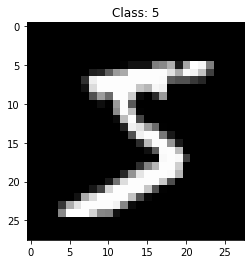

In [6]:
plt.imshow(x_train[0], cmap="gray")
plt.title('Class: ' + str(y_train[0]))

In [7]:
x_train.shape

(60000, 28, 28)

We take the dimension of the image (28 x 28) and to build a neural network capable of working with these we will have to make a transformation to one dimension instead of two. 

In [8]:
x_train = x_train.reshape(60000, 28 * 28)
x_train.shape

(60000, 784)

From here we can determine that the neural network we must build will have 784 neurons.

In [9]:
# lets look at a single element of the x_train data
# to see it is made up of integers.
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [10]:
x_test = x_test.reshape(10000, 28 * 28)
x_test.shape

(10000, 784)

**Note:** from the output above of assessing the values in x_train[0] that we have large numbers, well, numbers from 0 to 255. Such a range is again not optimal and we should normalise the data to a range of 0-1. This will massively speed up the process. To make the transformation we will have to move from integers to floats. 

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

We can now divide the valie sets by 255 (our previous maximum) to guarantee the maximum is 1.0.

In [12]:
# converts numbers to values between 0 & 1. 
x_train /= 255
x_test /= 255

In [13]:
x_train.max(), x_train.min()


(1.0, 0.0)

Now, if we take a look at the `y` data we can see we need to get it categorised. Luckily we can use the np_utils import to help here.

In [14]:
# transform the y_train and y_test. 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [15]:
# lets check a sample where we know the value, index 0 equalled the character 5. 
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Build & train the neural network

In [16]:
# We need to define the netowrk, again using the 
# number of inputs plus outputs / 2 as a starting point.
# shape is 784 -> 397 -> 397 -> 10
network = Sequential()

# add the first hidden layer specification, here
# we selected relu because it is suiitale for deep
# learning problems. 
network.add(Dense(input_shape = (784,), units=397, activation='relu'))

# add the 2nd hidden layer specification.
# again we have selected relu for the same 
# reasons as original hidden layer. 
network.add(Dense(units=397, activation='relu'))

# define the output layer. 
# Here we choose the 'softmax' because we have a 
# classification problem with mpre than two 
# choices. 
network.add(Dense(units=10, activation='softmax'))

In [20]:
network.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# uses the mini batch approach 
history = network.fit(x_train, y_train, batch_size=128, epochs=10)

#### Test the network

In [19]:
# to-do - experienced some library version hell. Come back to fix. 
# crashing the conda env. repeatable on a new env. Related crashes
# identified on google so moving on and revisit on a versions update